<a href="https://colab.research.google.com/github/Luhera123/airbnb-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path_file = "/content/drive/MyDrive/Colab Notebooks/AirBnB Bookings Analysis"
df = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/AirBnB Bookings Analysis/Airbnb NYC 2019.csv" )

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.info()

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.shape

(48895, 15)

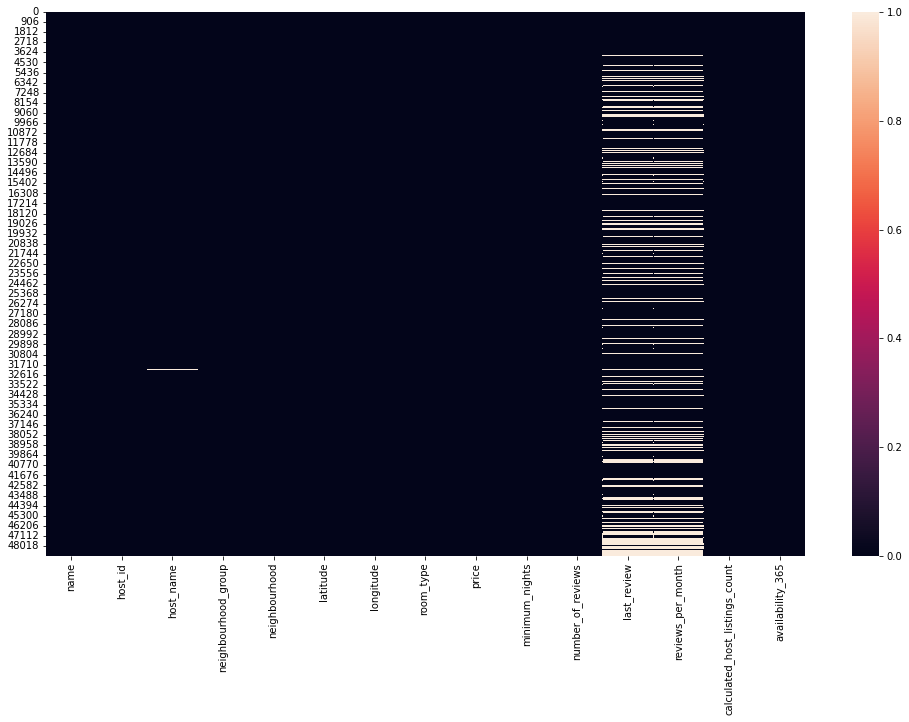

In [ ]:
#Visualization of Null values using Heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())


In [ ]:
df_data = df.copy()

In [ ]:
df_data_clean=df_data.loc[~df_data['host_name'].isnull()]

In [ ]:
df_data_clean['name'].replace({np.nan:'Missing'},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_data_clean['last_review'].replace({np.nan:'Missing'},inplace=True)

In [ ]:
df_data_clean['reviews_per_month'].replace({np.nan:'missing'},inplace=True)

In [ ]:
df_data_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


***1.What can we learn about different host and areas?*** 


i) How many numbers of hostes which has availbility of 365 days i.e 24x7

In [ ]:
#Copying the original dataframe
df_data_cleannew=df_data_clean.copy()
#printing the maximum availability
df_data_cleannew["availability_365"].max()

365

In [ ]:
#Fetching data host_id and availability_365 columns
availability_365_days=df_data_cleannew.loc[:,['host_id','availability_365']]
#Filtering out maximum availability of 365 days
host_available_365_days=availability_365_days[availability_365_days['availability_365']>364]
how_many_host_available_for_365_days=host_available_365_days['host_id'].nunique()
print(f"There are totally {how_many_host_available_for_365_days} which has availability of 365 days")

There are totally 894 which has availability of 365 days


 **2. What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
areas_reviews = df_data_cleannew.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


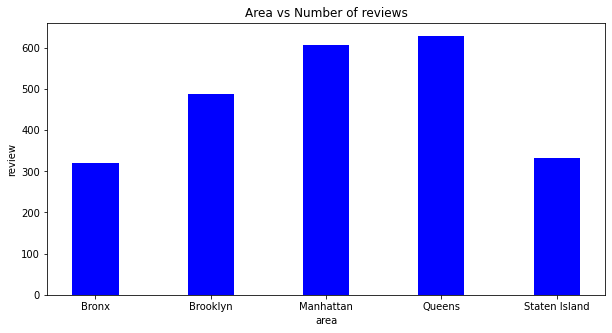

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='blue',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = df_data_cleannew.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


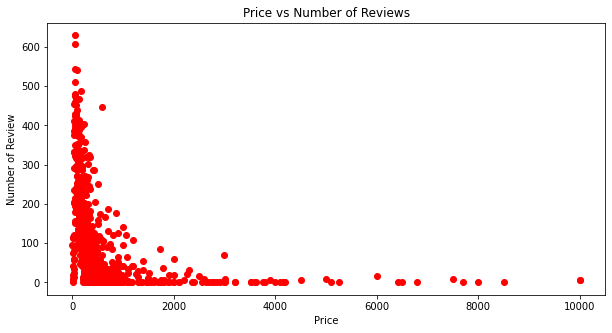

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price,color="red")
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

**3.Which hosts are the busiest and why?**

In [ ]:
busy_hosts = df_data_cleannew.groupby(['host_name'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by="number_of_reviews",ascending=False).head(10)
busy_hosts

,host_name,number_of_reviews
2652,Dona,629
4931,Jj,607
6981,Maya,543
1673,Carol,540
2290,Danielle,510
936,Asa,488
10830,Wanda,480
6153,Linda,474
2273,Dani,467
661,Angela,466


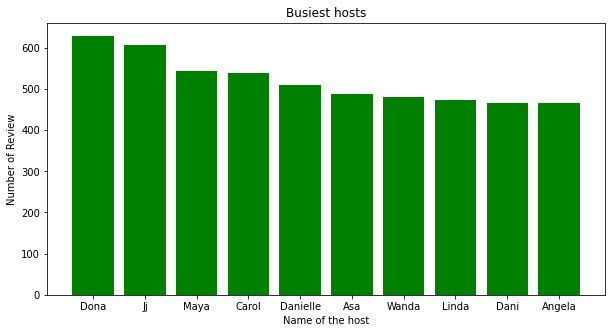

In [ ]:
name = busy_hosts['host_name']
reviews = busy_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name,reviews,color="green")
 
plt.xlabel("Name of the host")
plt.ylabel("Number of Review")
plt.title("Busiest hosts")
plt.show()

Q.whoes is the top 5 neighbourbood on the base on reviews?

Text(0.5, 1.0, 'Distribution of reviews in the top neighbourhoods')

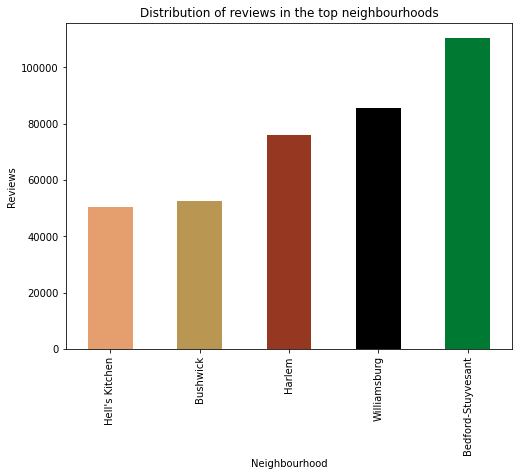

In [ ]:
neighs = df.groupby('neighbourhood')
reviews = neighs['number_of_reviews'].sum().sort_values().tail(5)

reviews.plot(kind = 'bar', color=['#e59e6d', '#ba9653', '#963821', 'black', '#007a33'], figsize = (8, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Reviews')
plt.title('Distribution of reviews in the top neighbourhoods')

In [ ]:
traffic_areas = df_data_cleannew.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13196
4,Brooklyn,Private room,10128
3,Brooklyn,Entire home/apt,9554
7,Manhattan,Private room,7976
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


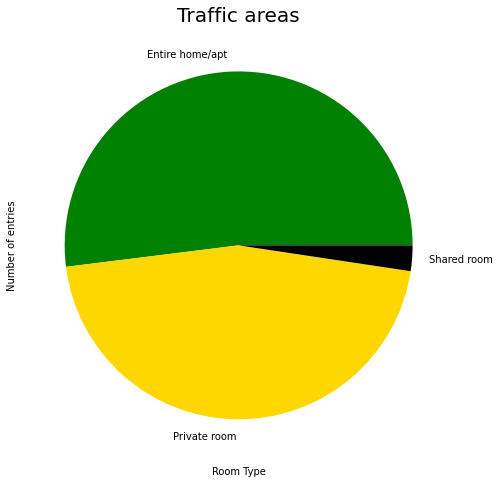

In [ ]:
df_data_cleannew['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black'], figsize = (8, 8))
plt.title('Traffic areas', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Number of entries')
plt.show()

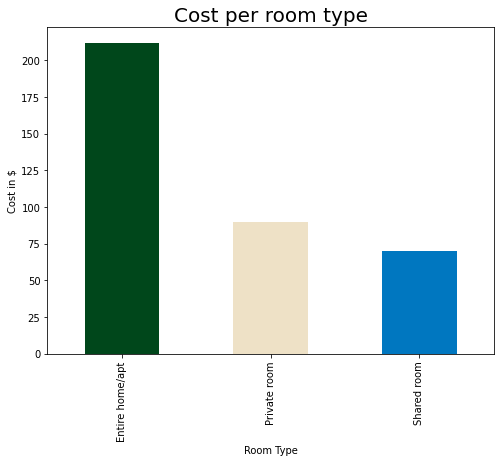

In [ ]:
# Group the data by the room type
room_types = df.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices = room_types['price'].mean().sort_values(ascending = False)
prices.plot(kind = 'bar', color=['#B23AEE', '	#EE3B3B', '#0000EE'] ,figsize = (16, 8))
plt.title('Cost per room type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Cost in $')
plt.show()

In [ ]:
types = prices.keys().tolist()
values = prices.tolist()

print('The most expensive room type is "{}" with {:.1f} mean price'.format(types[0], values[0]))

The most expensive room type is "Entire home/apt" with 211.8 mean price
